In [ ]:
;get height profiles for the waveforms
x = indgen(432)
lvisP.dz = (lgw.z0-lgw.z431)/431
for i = 0L,numshots-1 do begin
        lvisP(i).z0 = x(*)*(-lvisP(i).dz) + lgw(i).z0 - lge(i).zg   ;height above ground
End

;get waveforms
for i = 0L,numshots-1 do begin
        lvisP(i).wave0 = lgw(i).wave - lgw(i).sigmean
End

In [1]:
#Import Lib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
import sys

In [3]:
#Import L2 Product 

In [4]:
#L1_045612 = h5py.File(r'D:\Gabon_Lidar\DATA\level1\5000000734313-1\138349060\LVIS1B_Gabon2016_0308_R1808_045612.h5','r')
L2_045612 =(r'D:\Gabon_Lidar\DATA\LEVEL2_0308\LVIS2B_Gabon2016_0308_R1808_045612.txt')

In [5]:
#Import L1 Product 

In [6]:
lvis = h5py.File(r'D:\Gabon_Lidar\DATA\LEVEL1_0308\LVIS1B_Gabon2016_0308_R1808_045612.h5','r')
#get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = 1024
wfsize = 1023


In [7]:
#Bring in Shot of intrest 

In [8]:
#This looks Good 
myshotnum = int(9361769)

In [9]:
#Looking for my shot in the array 
wave_idx = np.where(all_shotnums==myshotnum)[0][0]

In [10]:
print(wave_idx)

49961


In [11]:
#extract the single waveform and elevation attributes Z0 and Z1023;
waveform = lvis['RXWAVE'][wave_idx]

In [12]:
Z0 = int(lvis['Z0'][wave_idx])

In [13]:
Z1023 = int(lvis['Z1023'][wave_idx])

In [14]:
x = Z0 - Z1023

In [15]:
L2 =pd.read_csv(r'D:\Gabon_Lidar\DATA\LEVEL2_0308\csv\LVIS2_Gabon2016_0308_R1808_045612.csv')

In [16]:
L2 = L2[(L2['SHOTNUMBER'] == myshotnum)]

In [17]:
#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

In [18]:
L2

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,RH98,RH99,RH100,AZIMUTH,INCIDENTANGLE,RANGE,COMPLEXITY,CHANNEL_L1B,CHANNEL_ZG,CHANNEL_RH
49961,1657455140,9361769,45679.156,9.422529,0.582682,19.35,-999,-999,-999,9.422531,...,15.43,16.62,19.24,350.9,2.8,7716.76,-999,1,1,1


In [19]:
ZG = float(L2['ZG'])

In [20]:
ZG

19.35

In [21]:
ZT = float(L2['ZT'])

In [22]:
ZT

38.59

In [23]:
RH25 = float(L2['RH25']+L2['ZG'])

In [24]:
RH25

26.39

In [25]:
RH50 = float(L2['RH50']+L2['ZG'])

In [26]:
RH50

28.86

In [27]:
RH75 = float(L2['RH75']+L2['ZG'])

In [28]:
RH75

30.810000000000002

In [29]:
RH10 = float(L2['RH10']+L2['ZG'])

In [30]:
RH10

22.950000000000003

In [31]:
waveform

array([65, 66, 66, ..., 61, 59, 60], dtype=uint16)

In [32]:
    #set the z range limits for plotting the waveform to crop the noise  
    zmin=RH10-(ZT-RH10)/6   #sets zmin at 15% below the waveform range defined in RH10-ZT
    zmax=ZT+(ZT-RH10)/18   #sets zmax at 5% above the waveform range defined in RH10-ZT

In [33]:
    #crop the waveform and elevation arrays to the z range limits
    x=zstretch>=zmin #this returns boolean True/False based on the comparison condition statement
    y=zstretch<=zmax 
    z=(x==y) #this creates a combined boolean result from the previous two condition statements
    waveform_crop = []
    zstretch_crop = []
    for i in range(0,len(waveform)):
        if z[i]==True:
            waveform_crop.append(waveform[i])
            zstretch_crop.append(zstretch[i])  
        

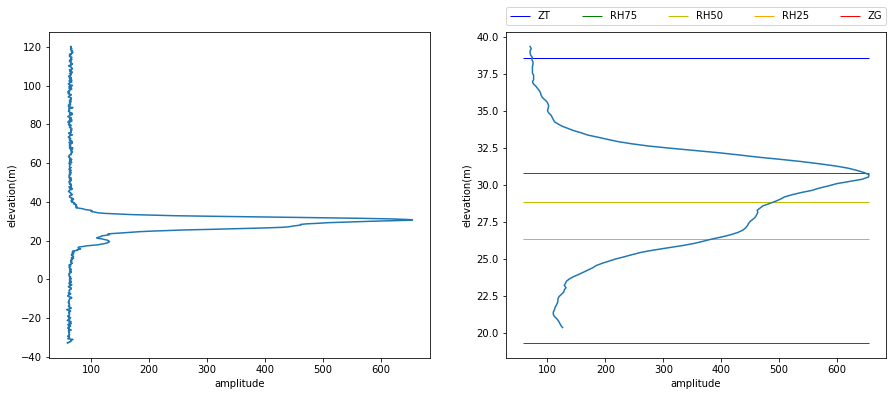

In [34]:
    #plot the waveform as matplotlib figure
    fig = plt.figure(figsize=(15, 6))
    figplot = fig.add_subplot(121) 
    figplot.plot(waveform,zstretch)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')

    figplot = fig.add_subplot(122) 
    figplot.plot(waveform_crop,zstretch_crop)
    figplot.hlines(ZT,min(waveform),max(waveform),lw=1,linestyle='-', color='b',label='ZT')
    figplot.hlines(RH75,min(waveform),max(waveform),lw=1,linestyle='-', color='g',label='RH75')
    figplot.hlines(RH50,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH50')
    figplot.hlines(RH25,min(waveform),max(waveform),lw=1,linestyle='-', color='orange',label='RH25')
    figplot.hlines(ZG,min(waveform),max(waveform),lw=1,linestyle='-', color='r',label='ZG')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    plt.show(block=False)

In [35]:
ZG

19.35

In [36]:
ZG = np.array(ZG)

In [37]:
print(type(ZG))

<class 'numpy.ndarray'>


In [38]:
print(type(waveform))

<class 'numpy.ndarray'>


In [39]:
#I don't understand why this math problem is not working. 

In [40]:
waveforma = np.subtract(waveform,ZG)

In [41]:
#waveforma = waveform.astype(np.int16) 

In [42]:
waveforma

array([45.65, 46.65, 46.65, ..., 41.65, 39.65, 40.65])

In [43]:
print(waveforma)

[45.65 46.65 46.65 ... 41.65 39.65 40.65]


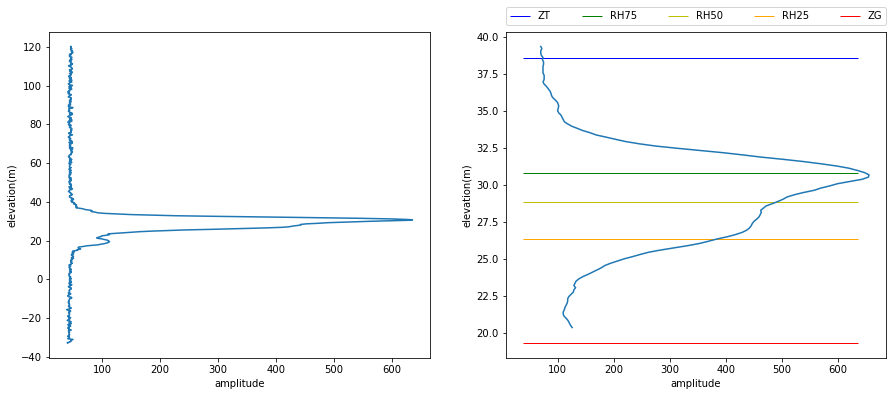

In [44]:
    #plot the waveform as matplotlib figure
    fig = plt.figure(figsize=(15, 6))
    figplot = fig.add_subplot(121) 
    figplot.plot(waveforma,zstretch)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')

    figplot = fig.add_subplot(122) 
    figplot.plot(waveform_crop,zstretch_crop)
    figplot.hlines(ZT,min(waveforma),max(waveforma),lw=1,linestyle='-', color='b',label='ZT')
    figplot.hlines(RH75,min(waveforma),max(waveforma),lw=1,linestyle='-', color='g',label='RH75')
    figplot.hlines(RH50,min(waveforma),max(waveforma),lw=1,linestyle='-', color='y',label='RH50')
    figplot.hlines(RH25,min(waveforma),max(waveforma),lw=1,linestyle='-', color='orange',label='RH25')
    figplot.hlines(ZG,min(waveforma),max(waveforma),lw=1,linestyle='-', color='r',label='ZG')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    plt.show(block=False)

In [45]:
#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

In [46]:
    #set the z range limits for plotting the waveform to crop the noise  
    zmin=RH10-(ZT-RH10)/6   #sets zmin at 15% below the waveform range defined in RH10-ZT
    zmax=ZT+(ZT-RH10)/18   #sets zmax at 5% above the waveform range defined in RH10-ZT

In [47]:
    #crop the waveform and elevation arrays to the z range limits
    x=zstretch>=zmin #this returns boolean True/False based on the comparison condition statement
    y=zstretch<=zmax 
    z=(x==y) #this creates a combined boolean result from the previous two condition statements
    waveform_crop = []
    zstretch_crop = []
    for i in range(0,len(waveform)):
        if z[i]==True:
            waveform_crop.append(waveforma[i])
            zstretch_crop.append(zstretch[i])  
        

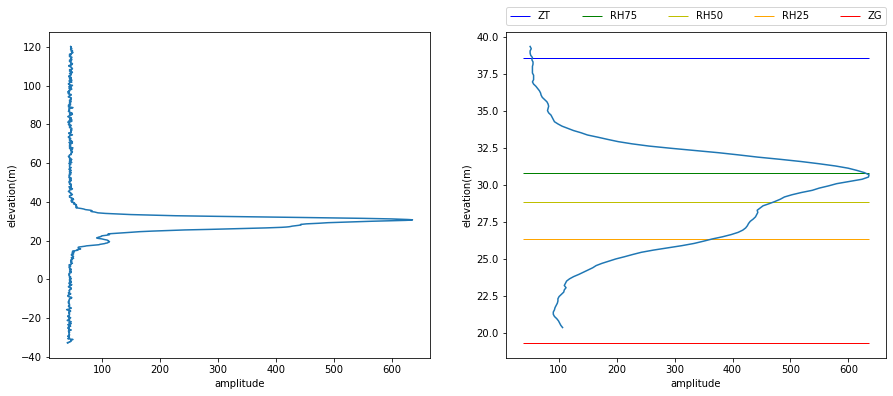

In [48]:
    #plot the waveform as matplotlib figure
    fig = plt.figure(figsize=(15, 6))
    figplot = fig.add_subplot(121) 
    figplot.plot(waveforma,zstretch)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')

    figplot = fig.add_subplot(122) 
    figplot.plot(waveform_crop,zstretch_crop)
    figplot.hlines(ZT,min(waveforma),max(waveforma),lw=1,linestyle='-', color='b',label='ZT')
    figplot.hlines(RH75,min(waveforma),max(waveforma),lw=1,linestyle='-', color='g',label='RH75')
    figplot.hlines(RH50,min(waveforma),max(waveforma),lw=1,linestyle='-', color='y',label='RH50')
    figplot.hlines(RH25,min(waveforma),max(waveforma),lw=1,linestyle='-', color='orange',label='RH25')
    figplot.hlines(ZG,min(waveforma),max(waveforma),lw=1,linestyle='-', color='r',label='ZG')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    plt.show(block=False)

In [49]:
L2 = L2[L2['plot'] == 'NASA23')]

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-49-4a0e6b10d69c>, line 1)

In [50]:
trees_in_geo_max.where(myshotnum == 'SHOTNUMBER')

NameError: name 'trees_in_geo_max' is not defined